# Practica de la cuba - Visualizacion y procesamiento de datos#

## Objetivo de la practica##

En la practica se tiene una cuba con agua (material poco conductor de la electricidad) donde se colocan electrodos con voltaje fijo. Debido a la presencia de los electrodos y a la baja conductividad del agua se genera una leve corriente en el volumen del liquido (que debido a la simetria en z consideramos un plano). Asociada a esta corriente hay un campo electrico que moviliza las cargas y por lo tanto hay un potencial que toma diferentes valores para cad apunto del plano. 

En la practica, utilizando un multimetro se mide el voltaje en diferentes puntos de la superficie. A partir de dichas mediciones (serie de datos de V en funcion de x e y) de pretende visualizar y procesar los datos para ver como es la forma del campo electrico creado.

## Introduccion de datos##

Para la introduccion de datos queremos tener la opcion de cargar el archivo de datos ya guardado o crear datos nuevos

In [1]:
# Cargamo librerias

%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import widgets
from IPython.display import display
from scipy import interpolate
from scipy.interpolate import griddata
import os
import csv

In [2]:
def load_data():
    nombre_archivo = filename.value+'.csv'
    if not os.path.isfile(nombre_archivo):
        if filename.value=='':
            print ('Debe introducir un nombre de archivo valido')
            return
        else:
            print ('El archivo especificado no fue encontrado (recuerde no incluir el .csv en el nombre')
            return
    return pd.read_csv(nombre_archivo)
    
def view_data(button):
    data = load_data()
    display ('Contenido del archivo: '+filename.value+'.csv')
    display(data)
    
def view3D (button):
    data = load_data()
    if data is None:
        return
    ax = plt.axes(projection='3d')
    ax.scatter(data['X'].tolist(), data['Y'].tolist(), data['V'].tolist(), c=data['V'].tolist(), cmap='viridis', linewidth=0.5);

def view3D_int (button):
    data = load_data()
    if data is None:
        return
    data = interpolate(data,10)
    ax = plt.axes(projection='3d')
    ax.scatter(data['X'].tolist(), data['Y'].tolist(), data['V'].tolist(), c=data['V'].tolist(), cmap='viridis', linewidth=0.5);

    
    
def add_data (button):
    if [coordenadaX.value,coordenadaY.value,voltaje.value] == [0,0,0]:
        return
    
    # CSV in python http://beancoder.com/csv-files-using-python/
    if edit.value:
        nombre_archivo = filename.value+'.csv'
        if not os.path.isfile(nombre_archivo):
            if filename.value=='':
                print ('Debe introducir un nombre de archivo valido')
                return
            # Create a new file with the header
            with open(nombre_archivo,'w') as newFile:
                newFileWriter = csv.writer(newFile)
                newFileWriter.writerow(['X','Y','V'])
                print ('Archivo: ' + nombre_archivo + ' creado exitosamente')
        
        with open(nombre_archivo,'a') as file:
            newFileWriter = csv.writer(file)
            newFileWriter.writerow([coordenadaX.value,coordenadaY.value,voltaje.value])
            # Reset the values in the GUI 
            coordenadaX.value = 0
            coordenadaY.value = 0
            voltaje.value = 0
    else:
        print ('Edicion del archivo no habilitada')

def interpolate(data,count):
    ti = np.linspace(data['X'].min(), data['X'].max(),count)
    tj = np.linspace(data['Y'].min(), data['Y'].max(),count)
    xi,yi = np.meshgrid(ti,tj)
    zi = griddata((data['X'],data['Y']),data['V'],(xi,yi),method='linear')

    X = [item for sublist in xi for item in sublist]
    Y = [item for sublist in yi for item in sublist]
    Z = [item for sublist in zi for item in sublist]

    return pd.DataFrame({'X':X,'Y':Y,'V':Z})
    
def view_contour(button):
    data = load_data()
    count = 10
    
    ti = np.linspace(data['X'].min(), data['X'].max(),count)
    tj = np.linspace(data['Y'].min(), data['Y'].max(),count)
    xi,yi = np.meshgrid(ti,tj)
    zi = griddata((data['X'],data['Y']),data['V'],(xi,yi),method='linear')

    plt.figure()
    plt.contour(xi,yi,zi,colors='k')
    plt.contourf(xi,yi,zi)
    plt.colorbar()
    plt.title('Lineas equipotenciales')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Creamos la interfaz grafica #

Label(value='Nombre del archivo donde se guardaran los datos: (distingue mayusculas de minusculas). Extension …

Text(value='')

Checkbox(value=False, description='Permitir edición')

Label(value='Introduccion de datos nuevos: (use , para marcar decimales si el sistema esta en español)')

FloatText(value=0.0, description='X:')

FloatText(value=0.0, description='Y:')

FloatText(value=0.0, description='V:')

Button(description='Agregar dato', style=ButtonStyle(), tooltip='Boton para agregar datos')

Button(description='Ver datos cargados', style=ButtonStyle(), tooltip='Muestra el contenido del archivo')

Button(description='visualizar en 3D', style=ButtonStyle(), tooltip='Visualizar')

Button(description='visualizar interpolado', style=ButtonStyle())

Button(description='curvas de nivel', style=ButtonStyle())

Debe introducir un nombre de archivo valido


<IPython.core.display.Javascript object>


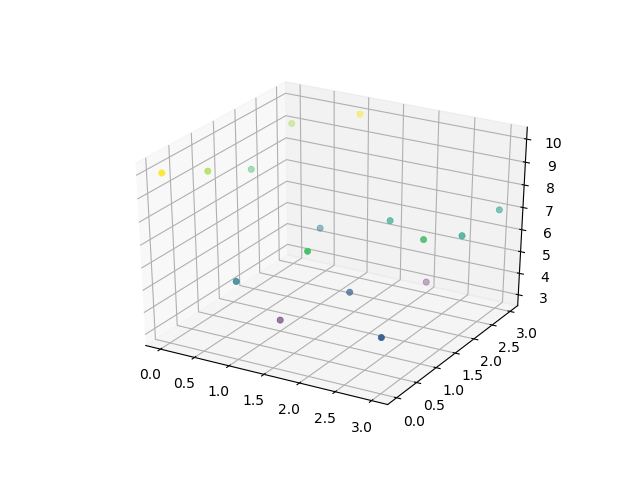

<IPython.core.display.Javascript object>


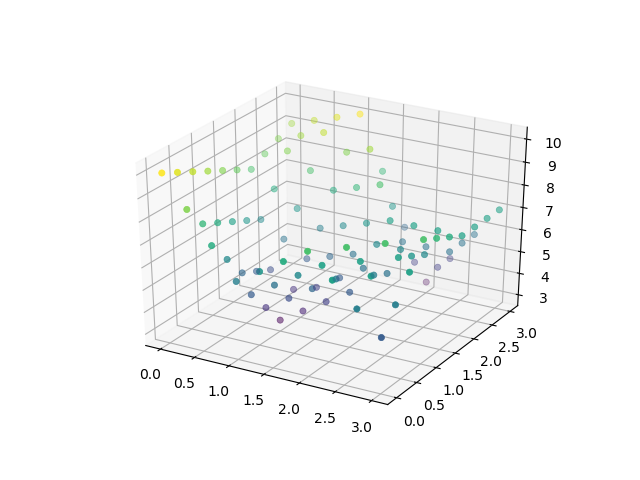

<IPython.core.display.Javascript object>


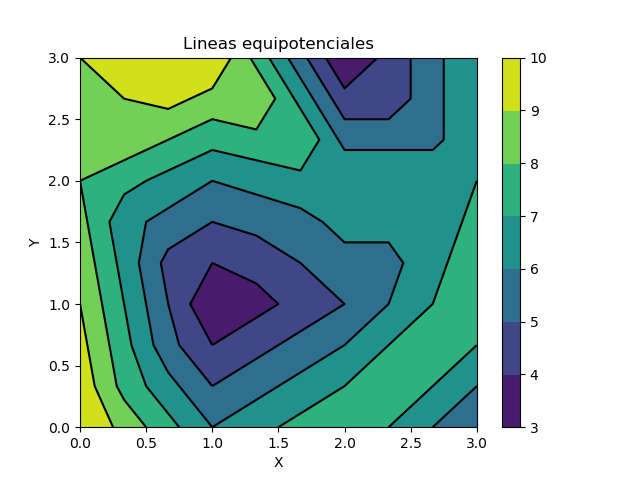

In [3]:
# Some help with widgets
# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html
# https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/

# Filename box
display (widgets.Label('Nombre del archivo donde se guardaran los datos: (distingue mayusculas de minusculas). Extension .csv automatica'))
filename = widgets.Text()
display(filename)

# Edition enable checkbox
edit = widgets.Checkbox(
    value=False,
    description='Permitir edición',
)
display (edit)

# Data boxes 
display (widgets.Label('Introduccion de datos nuevos: (use , para marcar decimales si el sistema esta en español)'))
coordenadaX = widgets.FloatText(
    value=0,
    description='X:',
)
display (coordenadaX)

coordenadaY = widgets.FloatText(
    value=0,
    description='Y:',
)
display (coordenadaY)

voltaje = widgets.FloatText(
    value=0,
    description='V:',
)
display (voltaje)

add_data_btn = widgets.Button(
    description='Agregar dato',
    tooltip='Boton para agregar datos',
)
add_data_btn.on_click(add_data)
display (add_data_btn)

# Data visulization
view_data_btn = widgets.Button(
    description='Ver datos cargados',
    tooltip='Muestra el contenido del archivo',
)
view_data_btn.on_click(view_data)
display (view_data_btn)

view3D_btn = widgets.Button(
    description='visualizar en 3D',
    tooltip='Visualizar',
)
view3D_btn.on_click(view3D)
display (view3D_btn)

view3D_int_btn = widgets.Button(
    description='visualizar interpolado',
)
view3D_int_btn.on_click(view3D_int)
display (view3D_int_btn)

view_contour_btn = widgets.Button(
    description='curvas de nivel',
)
view_contour_btn.on_click(view_contour)
display (view_contour_btn)